In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Matplotlib is building the font cache; this may take a moment.


In [2]:
# #Reading Data
# data=pd.read_csv(r"C:\Users\nisha\Downloads\individual+household+electric+power+consumption\household_power_consumption.txt",sep=';')

In [3]:
import boto3
import sagemaker

# Initialize SageMaker session and S3 bucket name
sagemaker_session = sagemaker.Session()
bucket_name = 'ccd-project-data'

# Load data from S3
file_path = 's3://ccd-project-data/household_power_consumption.txt'.format(bucket_name)
data = pd.read_csv(file_path, sep=';')


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:272: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)
/tmp/ipykernel_7416/4008263713.py:10: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';')


In [4]:
data.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
column_list = ['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Select rows where 'Sub_metering_3' column has null values
null_sub_metering_3 = data[data['Sub_metering_3'].isnull()]

# Display rows with null values in 'Sub_metering_3' column along with other specified columns
null_sub_metering_3[column_list]


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [8]:
#Cleaning the data
column_list = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data[column_list] = data[column_list].replace('?', np.nan)

In [9]:
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
data.loc[:, numeric_columns] = data.loc[:, numeric_columns].fillna(method='ffill')

/tmp/ipykernel_7416/1450946241.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.loc[:, numeric_columns] = data.loc[:, numeric_columns].fillna(method='ffill')


In [10]:
# Randomly sampling 1 lakh records
data = data.sample(n=100000, random_state=42)

In [11]:
data.reset_index(inplace=True,drop= True)

In [12]:
data.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,7/7/2010,18:10:00,0.256,0.106,242.000,1.200,0.000,0.000,1.0
1,14/5/2007,06:50:00,0.466,0.352,237.220,2.400,0.000,2.000,0.0
2,26/9/2007,18:10:00,0.758,0.194,238.660,3.200,0.000,1.000,0.0
3,19/6/2007,07:30:00,1.290,0.046,240.640,5.400,1.000,0.000,18.0
4,10/5/2010,04:43:00,0.428,0.202,242.230,1.800,0.000,2.000,1.0
5,13/8/2009,09:54:00,0.224,0.116,242.510,1.000,0.000,0.000,1.0
6,9/10/2010,23:53:00,1.206,0.302,242.100,5.000,0.000,1.000,12.0
7,27/8/2007,17:28:00,0.182,0.120,241.840,0.800,0.000,1.000,0.0
8,26/1/2009,14:08:00,1.792,0.068,242.390,7.400,0.000,0.000,18.0
9,5/10/2009,06:40:00,0.474,0.328,242.280,2.200,0.000,1.000,1.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    100000 non-null  object 
 3   Global_reactive_power  100000 non-null  object 
 4   Voltage                100000 non-null  object 
 5   Global_intensity       100000 non-null  object 
 6   Sub_metering_1         100000 non-null  object 
 7   Sub_metering_2         100000 non-null  object 
 8   Sub_metering_3         100000 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.9+ MB


In [14]:
data.describe()

,Sub_metering_3
count,100000.000000
mean,6.501090
std,8.446588
min,0.000000
25%,0.000000
50%,1.000000
75%,17.000000
max,31.000000


In [15]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Data Preprocessing

In [16]:
# data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')


In [17]:
# Convert Date column to datetime data type
data["Date"] = pd.to_datetime(data["Date"],format='%d/%m/%Y')

In [18]:
data.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2010-07-07,18:10:00,0.256,0.106,242.000,1.200,0.000,0.000,1.0,2010-07-07 18:10:00
1,2007-05-14,06:50:00,0.466,0.352,237.220,2.400,0.000,2.000,0.0,2007-05-14 06:50:00
2,2007-09-26,18:10:00,0.758,0.194,238.660,3.200,0.000,1.000,0.0,2007-09-26 18:10:00
3,2007-06-19,07:30:00,1.290,0.046,240.640,5.400,1.000,0.000,18.0,2007-06-19 07:30:00
4,2010-05-10,04:43:00,0.428,0.202,242.230,1.800,0.000,2.000,1.0,2010-05-10 04:43:00
5,2009-08-13,09:54:00,0.224,0.116,242.510,1.000,0.000,0.000,1.0,2009-08-13 09:54:00
6,2010-10-09,23:53:00,1.206,0.302,242.100,5.000,0.000,1.000,12.0,2010-10-09 23:53:00
7,2007-08-27,17:28:00,0.182,0.120,241.840,0.800,0.000,1.000,0.0,2007-08-27 17:28:00
8,2009-01-26,14:08:00,1.792,0.068,242.390,7.400,0.000,0.000,18.0,2009-01-26 14:08:00
9,2009-10-05,06:40:00,0.474,0.328,242.280,2.200,0.000,1.000,1.0,2009-10-05 06:40:00


In [24]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
#Converting columns from object datatype to numeric datatype
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [25]:
data.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2010-07-07,18:10:00,0.256,0.106,242.00,1.2,0.0,0.0,1.0,2010-07-07 18:10:00
1,2007-05-14,06:50:00,0.466,0.352,237.22,2.4,0.0,2.0,0.0,2007-05-14 06:50:00
2,2007-09-26,18:10:00,0.758,0.194,238.66,3.2,0.0,1.0,0.0,2007-09-26 18:10:00
3,2007-06-19,07:30:00,1.290,0.046,240.64,5.4,1.0,0.0,18.0,2007-06-19 07:30:00
4,2010-05-10,04:43:00,0.428,0.202,242.23,1.8,0.0,2.0,1.0,2010-05-10 04:43:00
5,2009-08-13,09:54:00,0.224,0.116,242.51,1.0,0.0,0.0,1.0,2009-08-13 09:54:00
6,2010-10-09,23:53:00,1.206,0.302,242.10,5.0,0.0,1.0,12.0,2010-10-09 23:53:00
7,2007-08-27,17:28:00,0.182,0.120,241.84,0.8,0.0,1.0,0.0,2007-08-27 17:28:00
8,2009-01-26,14:08:00,1.792,0.068,242.39,7.4,0.0,0.0,18.0,2009-01-26 14:08:00
9,2009-10-05,06:40:00,0.474,0.328,242.28,2.2,0.0,1.0,1.0,2009-10-05 06:40:00


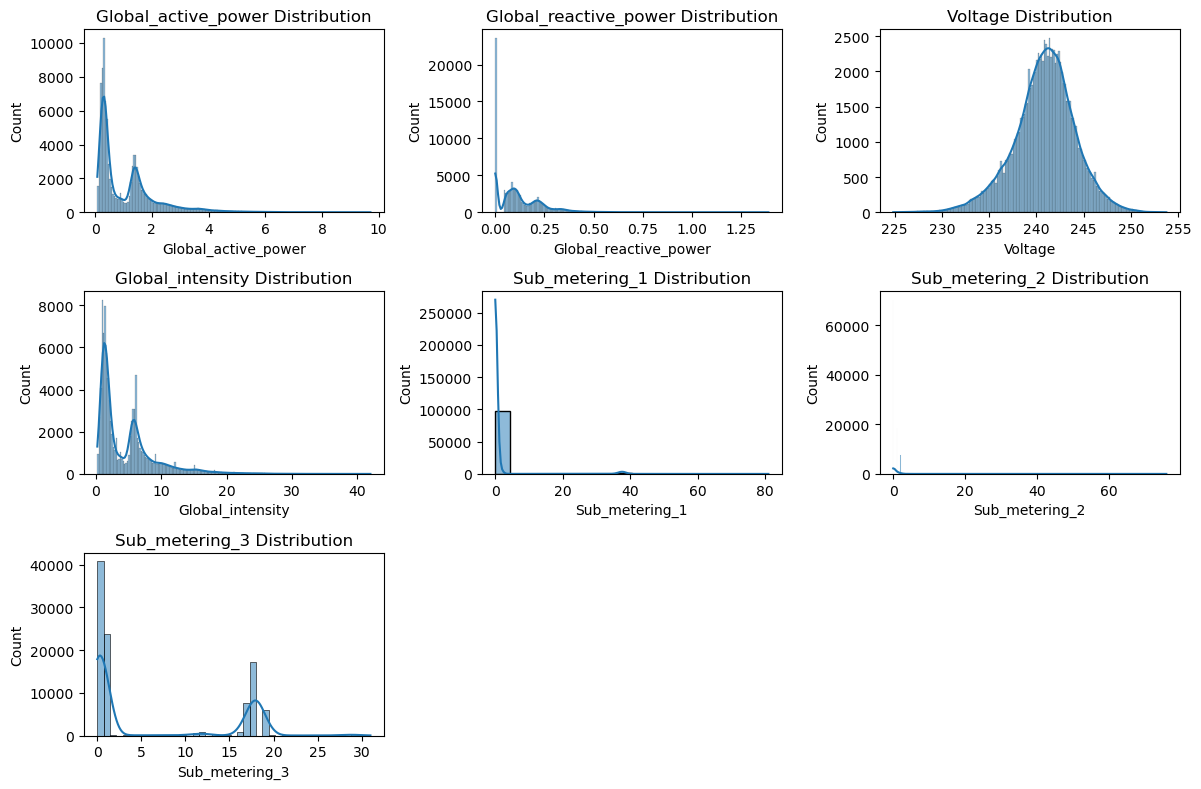

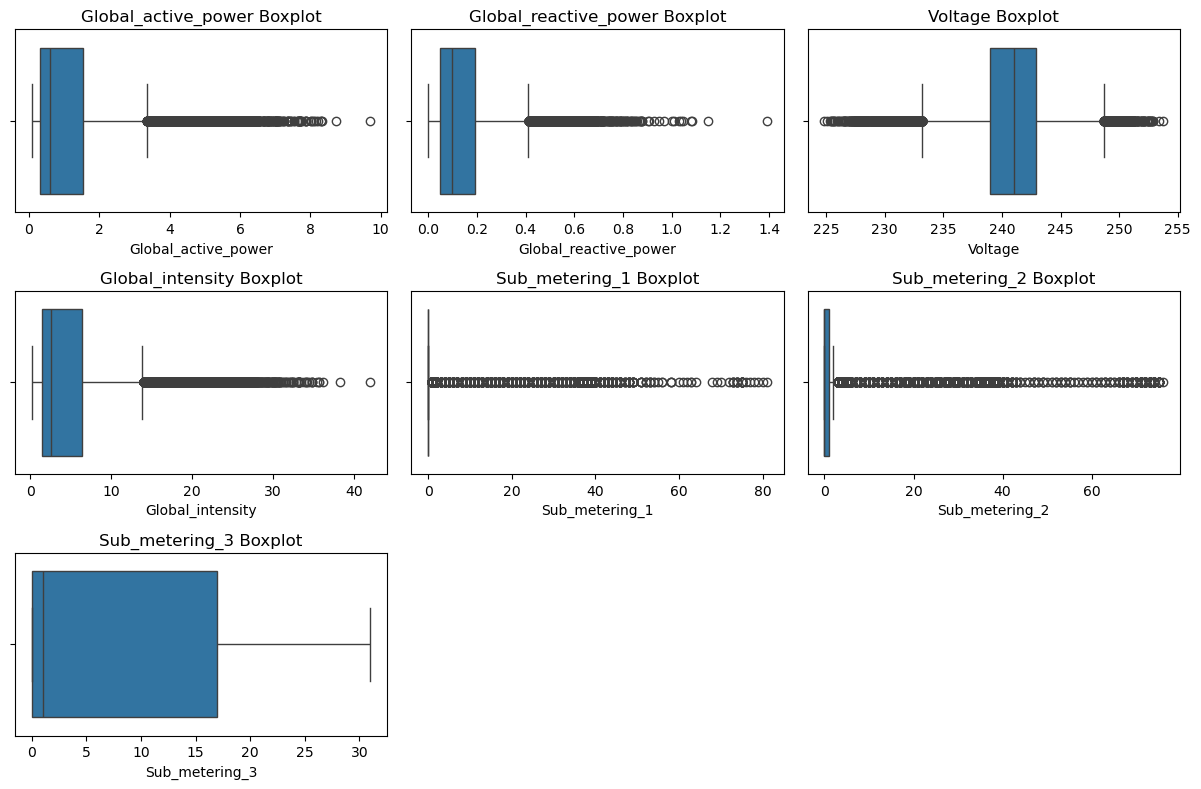

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns for visualization
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Plot histograms for numeric columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(col + ' Distribution')
plt.tight_layout()
plt.show()

# Plot boxplots for numeric columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(col + ' Boxplot')
plt.tight_layout()
plt.show()


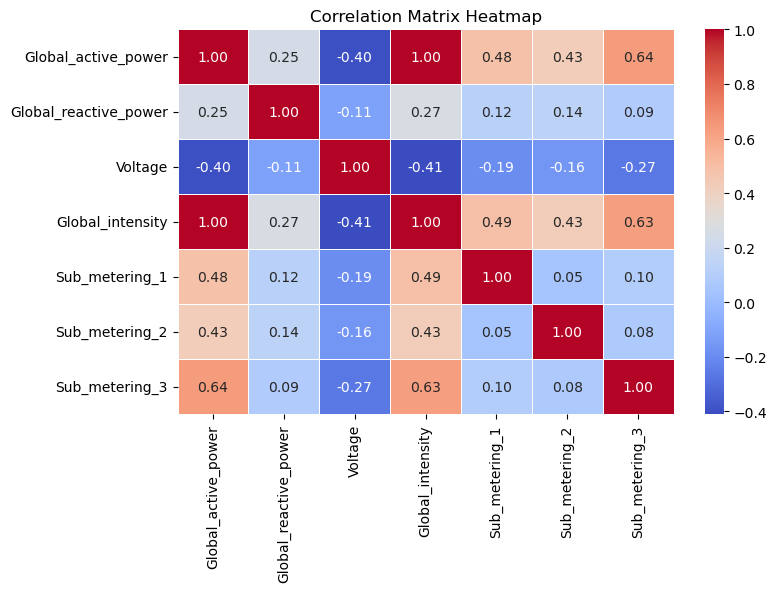

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
# corr_matrix = data.corr()
numeric_columns = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numeric_columns].corr()


# Plotting the correlation matrix heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
# Extracting day of the week, month, and hour
data['Day_of_week'] = data['Datetime'].dt.dayofweek
data['Month'] = data['Datetime'].dt.month
data['Hour'] = data['Datetime'].dt.hour
data.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week,Month,Hour
0,2010-07-07,18:10:00,0.256,0.106,242.00,1.2,0.0,0.0,1.0,2010-07-07 18:10:00,2,7,18
1,2007-05-14,06:50:00,0.466,0.352,237.22,2.4,0.0,2.0,0.0,2007-05-14 06:50:00,0,5,6
2,2007-09-26,18:10:00,0.758,0.194,238.66,3.2,0.0,1.0,0.0,2007-09-26 18:10:00,2,9,18
3,2007-06-19,07:30:00,1.290,0.046,240.64,5.4,1.0,0.0,18.0,2007-06-19 07:30:00,1,6,7
4,2010-05-10,04:43:00,0.428,0.202,242.23,1.8,0.0,2.0,1.0,2010-05-10 04:43:00,0,5,4
5,2009-08-13,09:54:00,0.224,0.116,242.51,1.0,0.0,0.0,1.0,2009-08-13 09:54:00,3,8,9
6,2010-10-09,23:53:00,1.206,0.302,242.10,5.0,0.0,1.0,12.0,2010-10-09 23:53:00,5,10,23
7,2007-08-27,17:28:00,0.182,0.120,241.84,0.8,0.0,1.0,0.0,2007-08-27 17:28:00,0,8,17
8,2009-01-26,14:08:00,1.792,0.068,242.39,7.4,0.0,0.0,18.0,2009-01-26 14:08:00,0,1,14
9,2009-10-05,06:40:00,0.474,0.328,242.28,2.2,0.0,1.0,1.0,2009-10-05 06:40:00,0,10,6


In [32]:
# import calendar
# data['Month'] = data['Month'].apply(lambda x: calendar.month_name[x])
# data.head(10)

import calendar

month_name_to_number = {month_name: month_number for month_number, month_name in enumerate(calendar.month_name) if month_name}
data['Month'] = data['Month'].apply(lambda x: month_name_to_number.get(x))

# Verify if the conversion was successful
data.head(10)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week,Month,Hour
0,2010-07-07,18:10:00,0.256,0.106,242.00,1.2,0.0,0.0,1.0,2010-07-07 18:10:00,2,7,18
1,2007-05-14,06:50:00,0.466,0.352,237.22,2.4,0.0,2.0,0.0,2007-05-14 06:50:00,0,5,6
2,2007-09-26,18:10:00,0.758,0.194,238.66,3.2,0.0,1.0,0.0,2007-09-26 18:10:00,2,9,18
3,2007-06-19,07:30:00,1.290,0.046,240.64,5.4,1.0,0.0,18.0,2007-06-19 07:30:00,1,6,7
4,2010-05-10,04:43:00,0.428,0.202,242.23,1.8,0.0,2.0,1.0,2010-05-10 04:43:00,0,5,4
5,2009-08-13,09:54:00,0.224,0.116,242.51,1.0,0.0,0.0,1.0,2009-08-13 09:54:00,3,8,9
6,2010-10-09,23:53:00,1.206,0.302,242.10,5.0,0.0,1.0,12.0,2010-10-09 23:53:00,5,10,23
7,2007-08-27,17:28:00,0.182,0.120,241.84,0.8,0.0,1.0,0.0,2007-08-27 17:28:00,0,8,17
8,2009-01-26,14:08:00,1.792,0.068,242.39,7.4,0.0,0.0,18.0,2009-01-26 14:08:00,0,1,14
9,2009-10-05,06:40:00,0.474,0.328,242.28,2.2,0.0,1.0,1.0,2009-10-05 06:40:00,0,10,6


In [33]:
data=data.sort_index()
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week,Month,Hour
0,2010-07-07,18:10:00,0.256,0.106,242.00,1.2,0.0,0.0,1.0,2010-07-07 18:10:00,2,7,18
1,2007-05-14,06:50:00,0.466,0.352,237.22,2.4,0.0,2.0,0.0,2007-05-14 06:50:00,0,5,6
2,2007-09-26,18:10:00,0.758,0.194,238.66,3.2,0.0,1.0,0.0,2007-09-26 18:10:00,2,9,18
3,2007-06-19,07:30:00,1.290,0.046,240.64,5.4,1.0,0.0,18.0,2007-06-19 07:30:00,1,6,7
4,2010-05-10,04:43:00,0.428,0.202,242.23,1.8,0.0,2.0,1.0,2010-05-10 04:43:00,0,5,4


/tmp/ipykernel_7416/468877075.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_daily = data['Global_active_power'].resample('D').mean().fillna(method='ffill')


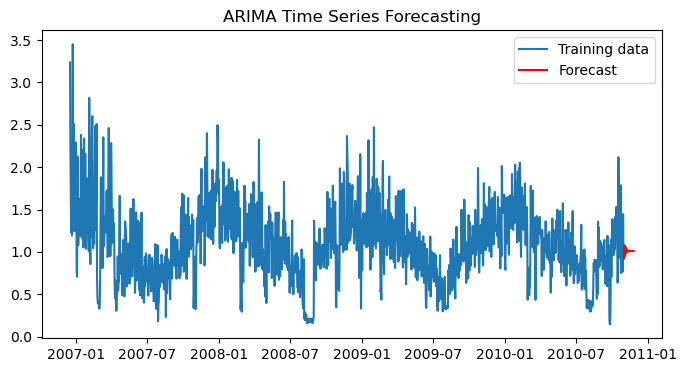

In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

# Resampling data to daily frequency for demonstration (adjust frequency as per your data)
data_daily = data['Global_active_power'].resample('D').mean().fillna(method='ffill')

# Splitting data for training (4 years) and testing (last 30 days)
train_data = data_daily['2006-12-01':'2010-10-31']
test_data = data_daily['2010-11-01':'2010-11-30']

# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))  # Example order, you might need to tune these parameters
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test_data))

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(train_data, label='Training data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Time Series Forecasting')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Assuming 'test_data' contains the actual values and 'forecast' contains the predicted values

# Calculate metrics
mse = mean_squared_error(test_data, forecast)
rmse = mean_squared_error(test_data, forecast, squared=False)  # Calculating RMSE by setting squared=False
mae = mean_absolute_error(test_data, forecast)
mape = mean_absolute_percentage_error(test_data, forecast)
r2 = r2_score(test_data, forecast)

# Print the metrics
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R-squared (R²): {r2}")

MSE: 0.09951578633110109
RMSE: 0.31546122793633624
MAE: 0.2467899897247806
MAPE: 0.18995947578438194
R-squared (R²): -0.6945961405994641


/tmp/ipykernel_7416/4196445235.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_daily = data['Global_active_power'].resample('W').mean().fillna(method='ffill')


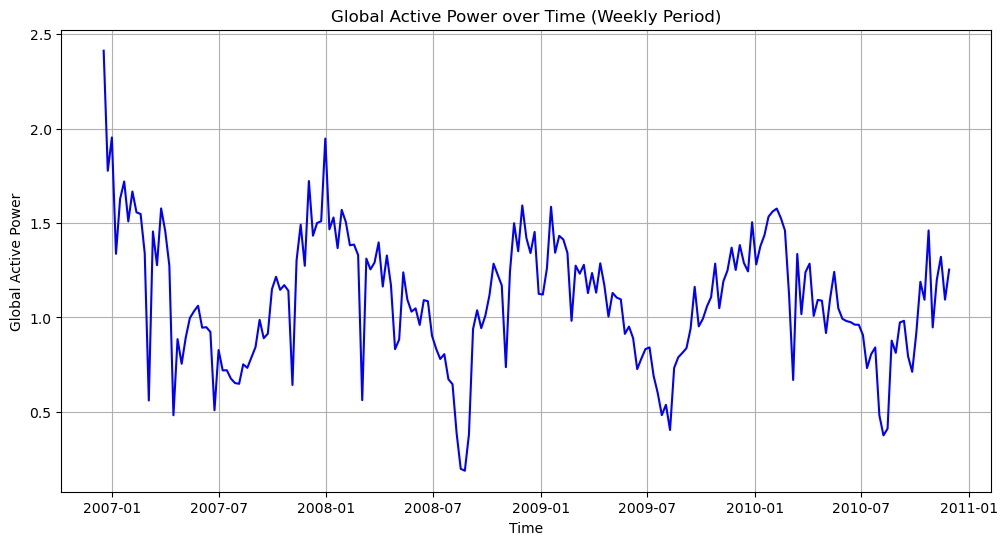

In [36]:
import matplotlib.pyplot as plt

# Resample the data to a daily frequency
data_daily = data['Global_active_power'].resample('W').mean().fillna(method='ffill')

# Plotting the Global_active_power over time with a weekly frequency
plt.figure(figsize=(12, 6))
plt.plot(data_daily.index, data_daily.values, color='blue')
plt.title('Global Active Power over Time (Weekly Period)')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()


/tmp/ipykernel_7416/1008975230.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_monthly = data['Global_active_power'].resample('M').mean().fillna(method='ffill')
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71403D-01    |proj g|=  2.63916D-01

At iterate    5    f=  1.86342D-01    |proj g|=  2.82658D-02

At iterate   10    f=  1.85469D-01    |proj g|=  7.32763D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     20      1     0     0   1.118D-04   1.855D-01
  F =  0.18546918955931069     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


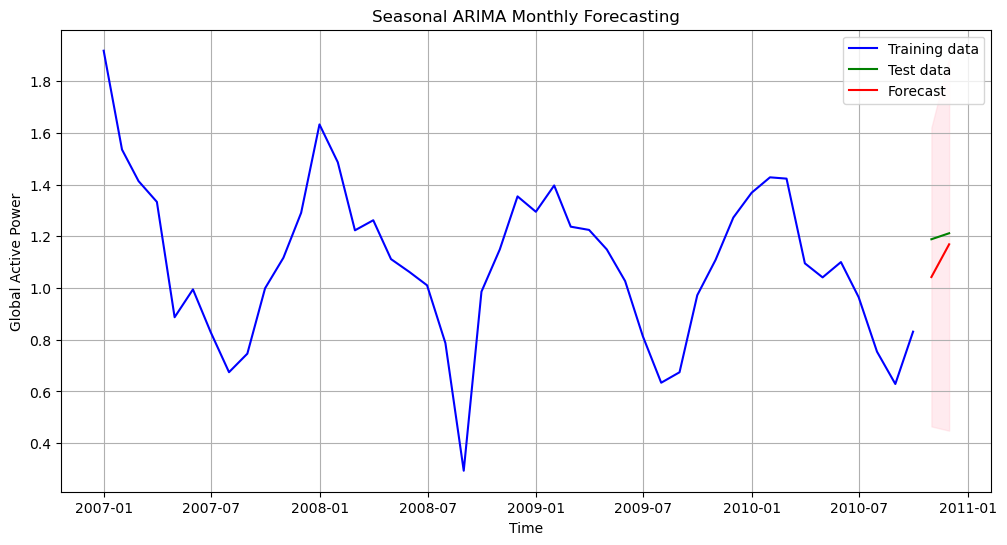

In [37]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Resample the data to monthly frequency
data_monthly = data['Global_active_power'].resample('M').mean().fillna(method='ffill')

# Splitting data for training and testing
train_data = data_monthly['2006-12-01':'2010-09-30']
test_data = data_monthly['2010-10-01':'2010-11-30']

# Fit SARIMA model
order = (1, 2, 1)  # Example parameters for non-seasonal components (p, d, q)
seasonal_order = (1, 2, 1, 12)  # Monthly seasonality
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecasting
forecast = model_fit.get_forecast(steps=len(test_data))

# Extracting forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.values, label='Training data', color='blue')
plt.plot(test_data.index, test_data.values, label='Test data', color='green')
plt.plot(test_data.index, forecast_values, label='Forecast', color='red')
plt.fill_between(test_data.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Seasonal ARIMA Monthly Forecasting')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'test_data' contains the actual values and 'forecast_values' contains the forecasted values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, forecast_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data, forecast_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
Mean Absolute Percentage Error (MAPE): 7.91%


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data_encoded = pd.get_dummies(data, columns=['Month', 'Day_of_week'])

# Remove the original categorical columns from the features
X = data_encoded.drop(['Global_active_power', 'Date', 'Time'], axis=1)
y=data_encoded['Global_active_power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.001614843569748036
Mean Absolute Error (MAE): 0.025619273197546717
R-squared (R²): 0.9985397228563241


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Convert categorical columns to one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Month', 'Day_of_week'])

X = data_encoded.drop(['Global_active_power', 'Date', 'Time'], axis=1)
y = data_encoded['Global_active_power']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate various evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.0012071110541325
Mean Absolute Error (MAE): 0.02124251506888445
R-squared (R²): 0.9989084288315906


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Convert categorical columns to one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Month', 'Day_of_week'])

# Drop non-numeric columns for regression
regression_data = data_encoded.drop(['Date', 'Time'], axis=1)

# Filling any missing values (NaNs) with mean values
regression_data.fillna(regression_data.mean(), inplace=True)

# Define your features and target variable
X = regression_data.drop('Global_active_power', axis=1)
y = regression_data['Global_active_power']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error: 0.0011088617906635477
Mean Absolute Error (MAE): 0.02124251506888445
R-squared (R²): 0.9989084288315906
